In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import sklearn
from sklearn.model_selection import train_test_split

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
heart = pd.read_csv("heart.csv")

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.shape

(303, 14)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

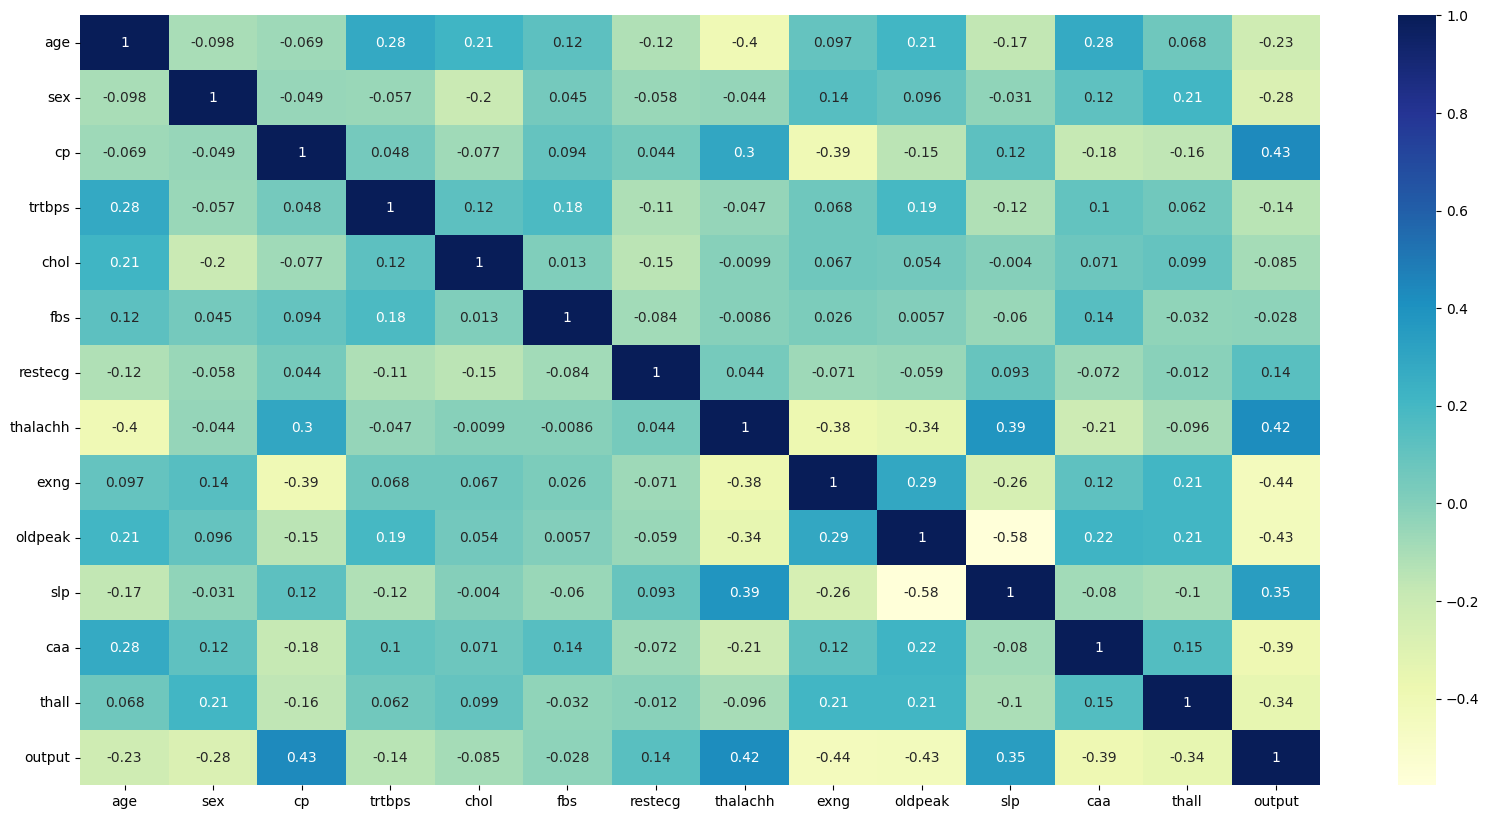

In [8]:
plt.subplots(figsize=(20,10))
sns.heatmap(heart.corr(),annot=True, cmap="YlGnBu")

Checking whether the data are balanced.

In [9]:
heart.output.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

In [ ]:
sns.barplot(x="output", y="age", data=heart)

<AxesSubplot:xlabel='sex', ylabel='count'>

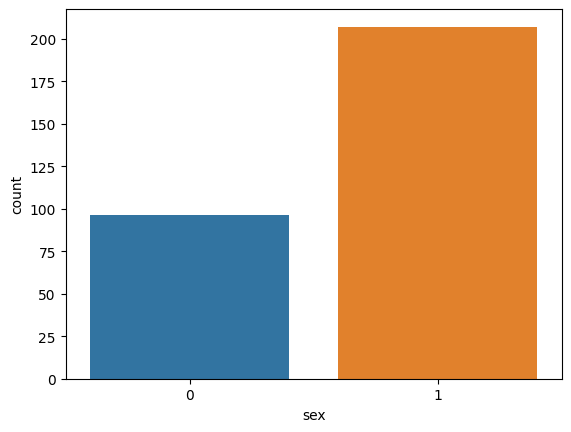

In [10]:
sns.countplot(x="sex", data=heart)

<AxesSubplot:xlabel='cp', ylabel='count'>

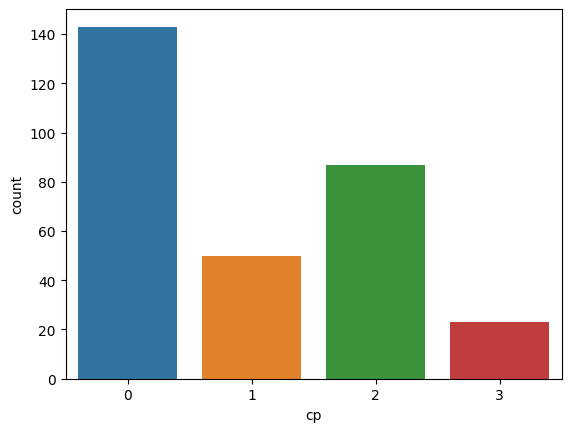

In [11]:
sns.countplot(x="cp", data=heart)

In [14]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

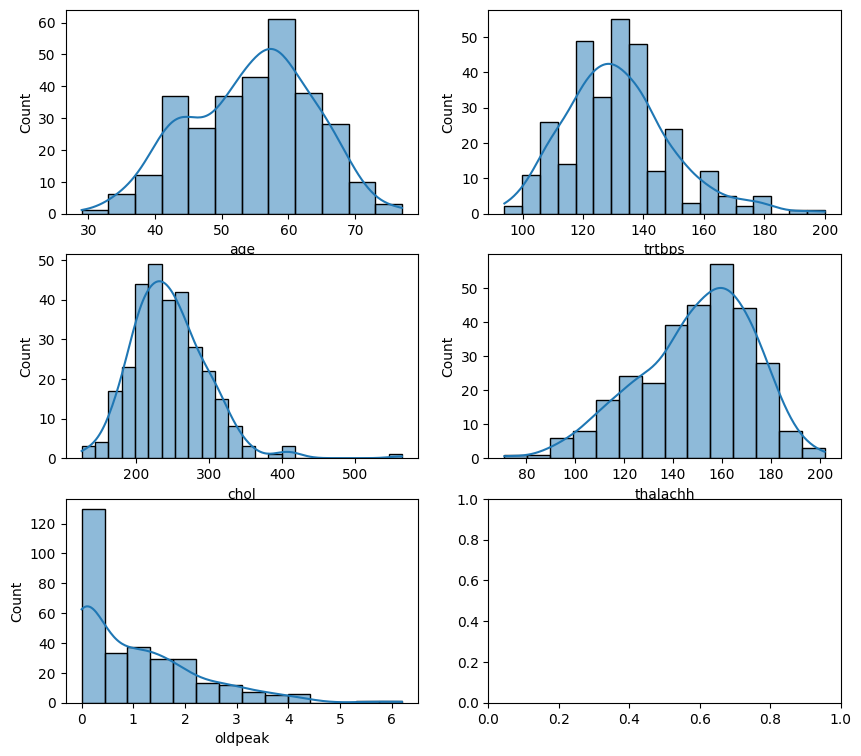

In [15]:
numeric_cols = ['age', 'trtbps', 'chol', 'thalachh','oldpeak']
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,9))
for i, col in enumerate(numeric_cols):
    ax = axes.flat[i]
    sns.histplot(x = col, data = heart, kde = True, ax = ax)

In [19]:
def clean(data):
    numeric = data.loc[:,['age', 'trtbps', 'chol', 'thalachh','oldpeak']]
    for column in numeric.columns:
        numeric[column] = (numeric[column] - numeric[column].mean()) / numeric[column].std()
    cat = data.loc[:,["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]]
    y = data.loc[:,"output"]
    cpVal, cpUnique = pd.factorize(cat["cp"], sort=True)
    fbsVal, fbsUnique = pd.factorize(cat["fbs"], sort=True)
    restecgVal, restecgUnique = pd.factorize(cat["restecg"], sort=True)
    slpVal, slpUnique = pd.factorize(cat["slp"], sort=True)
    thallVal, thallUnique = pd.factorize(cat["thall"], sort=True)
    cat["cp"] = cpVal
    cat["fbs"] = fbsVal
    cat["restecg"] = restecgVal
    cat["slp"] = slpVal
    cat["thall"] = thallVal
    X = np.concatenate((numeric, cat), axis = 1)
    return X,y

In [20]:
train, test = train_test_split(heart, train_size = 0.7, test_size=0.3, random_state = 1)
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0


In [21]:
X, y = clean(train)

In [22]:
X

array([[-0.33412438, -0.33182594, -0.65426684, ...,  2.        ,
         1.        ,  2.        ],
       [-1.09461606, -1.06933584,  0.99774428, ...,  2.        ,
         1.        ,  2.        ],
       [-0.00819937, -0.38855747,  0.48283172, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [-2.7242411 , -0.04816828, -0.84735905, ...,  2.        ,
         0.        ,  2.        ],
       [-0.33412438,  0.51914703,  1.19083649, ...,  2.        ,
         0.        ,  3.        ],
       [-0.00819937,  1.08646234, -0.24662773, ...,  2.        ,
         0.        ,  3.        ]])

In [23]:
y

34     1
185    0
187    0
147    1
202    0
      ..
203    0
255    0
72     1
235    0
37     1
Name: output, Length: 212, dtype: int64

Factorizing multinomial variables.

In [24]:
k = X.shape[1]

### Full Model

In [25]:
with pm.Model() as heart_model:
    b0 = pm.Normal('b0', mu=0, sigma=1)
    b = pm.MvNormal('b', mu=np.zeros(k), cov=np.eye(k), shape=k)
    
    mu = b0 + pm.math.dot(X,b)
    theta = pm.Deterministic('theta', pm.invlogit(mu))
    y_hat = pm.Bernoulli('yhat', p=theta, observed=y)
    trace_main = pm.sample(10000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b0, b]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 1238 seconds.


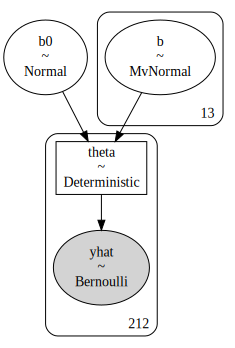

In [29]:
pm.model_to_graphviz(heart_model)

In [30]:
az.summary(trace_main, var_names=['b0','b'], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b0,0.59,0.73,-0.84,1.92,0.01,0.0,16174.82,14644.68,1.0
b[0],-0.15,0.25,-0.60,0.32,0.00,0.0,23637.79,15899.76,1.0
b[1],-0.39,0.23,-0.84,0.03,0.00,0.0,20456.00,15336.55,1.0
b[2],-0.23,0.24,-0.68,0.20,0.00,0.0,26361.95,15081.56,1.0
b[3],0.76,0.29,0.24,1.31,0.00,0.0,19889.34,16229.60,1.0
b[4],-0.92,0.29,-1.48,-0.38,0.00,0.0,21456.34,15775.58,1.0
b[5],-1.74,0.50,-2.68,-0.81,0.00,0.0,20180.84,15312.29,1.0
b[6],1.20,0.23,0.77,1.64,0.00,0.0,21292.96,15135.60,1.0
b[7],0.24,0.56,-0.81,1.27,0.00,0.0,28750.46,15565.01,1.0
b[8],0.67,0.40,-0.08,1.42,0.00,0.0,27717.90,15308.02,1.0


b[3], b[4], b[5], b[6], b[9], b[11]  </br>
we leave the rest out because of 94% posterior credibility <br>
link: https://www.sciencedirect.com/topics/mathematics/highest-density-interval#:~:text=2%20Bayesian%20HDI,such%20%CE%B8%20values%20is%2095%25.

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

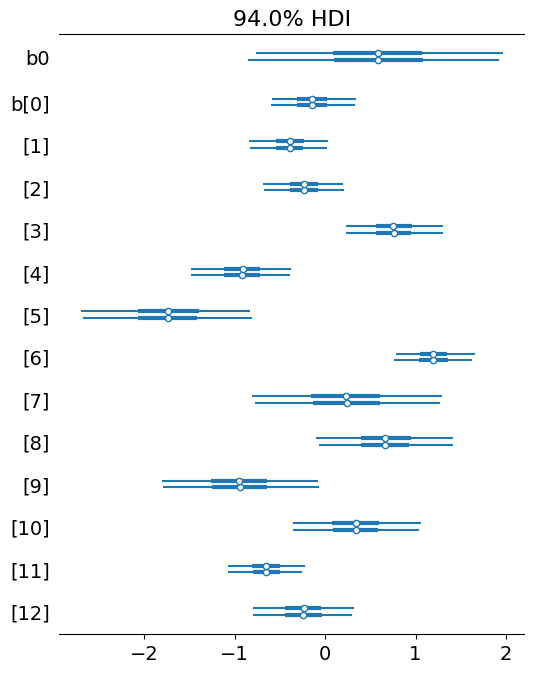

In [31]:
az.plot_forest(trace_main, var_names=['b0','b'])

We can also see that credible interevals for predictors B[5], B[7], b[9]  are wider than the others. This demonstrates that there is more uncertainty in these predictors than the others.

array([[<AxesSubplot:title={'center':'b0'}>,
        <AxesSubplot:title={'center':'b0'}>],
       [<AxesSubplot:title={'center':'b\n0'}>,
        <AxesSubplot:title={'center':'b\n0'}>],
       [<AxesSubplot:title={'center':'b\n1'}>,
        <AxesSubplot:title={'center':'b\n1'}>],
       [<AxesSubplot:title={'center':'b\n2'}>,
        <AxesSubplot:title={'center':'b\n2'}>],
       [<AxesSubplot:title={'center':'b\n3'}>,
        <AxesSubplot:title={'center':'b\n3'}>],
       [<AxesSubplot:title={'center':'b\n4'}>,
        <AxesSubplot:title={'center':'b\n4'}>],
       [<AxesSubplot:title={'center':'b\n5'}>,
        <AxesSubplot:title={'center':'b\n5'}>],
       [<AxesSubplot:title={'center':'b\n6'}>,
        <AxesSubplot:title={'center':'b\n6'}>],
       [<AxesSubplot:title={'center':'b\n7'}>,
        <AxesSubplot:title={'center':'b\n7'}>],
       [<AxesSubplot:title={'center':'b\n8'}>,
        <AxesSubplot:title={'center':'b\n8'}>],
       [<AxesSubplot:title={'center':'b\n9'}>,
       

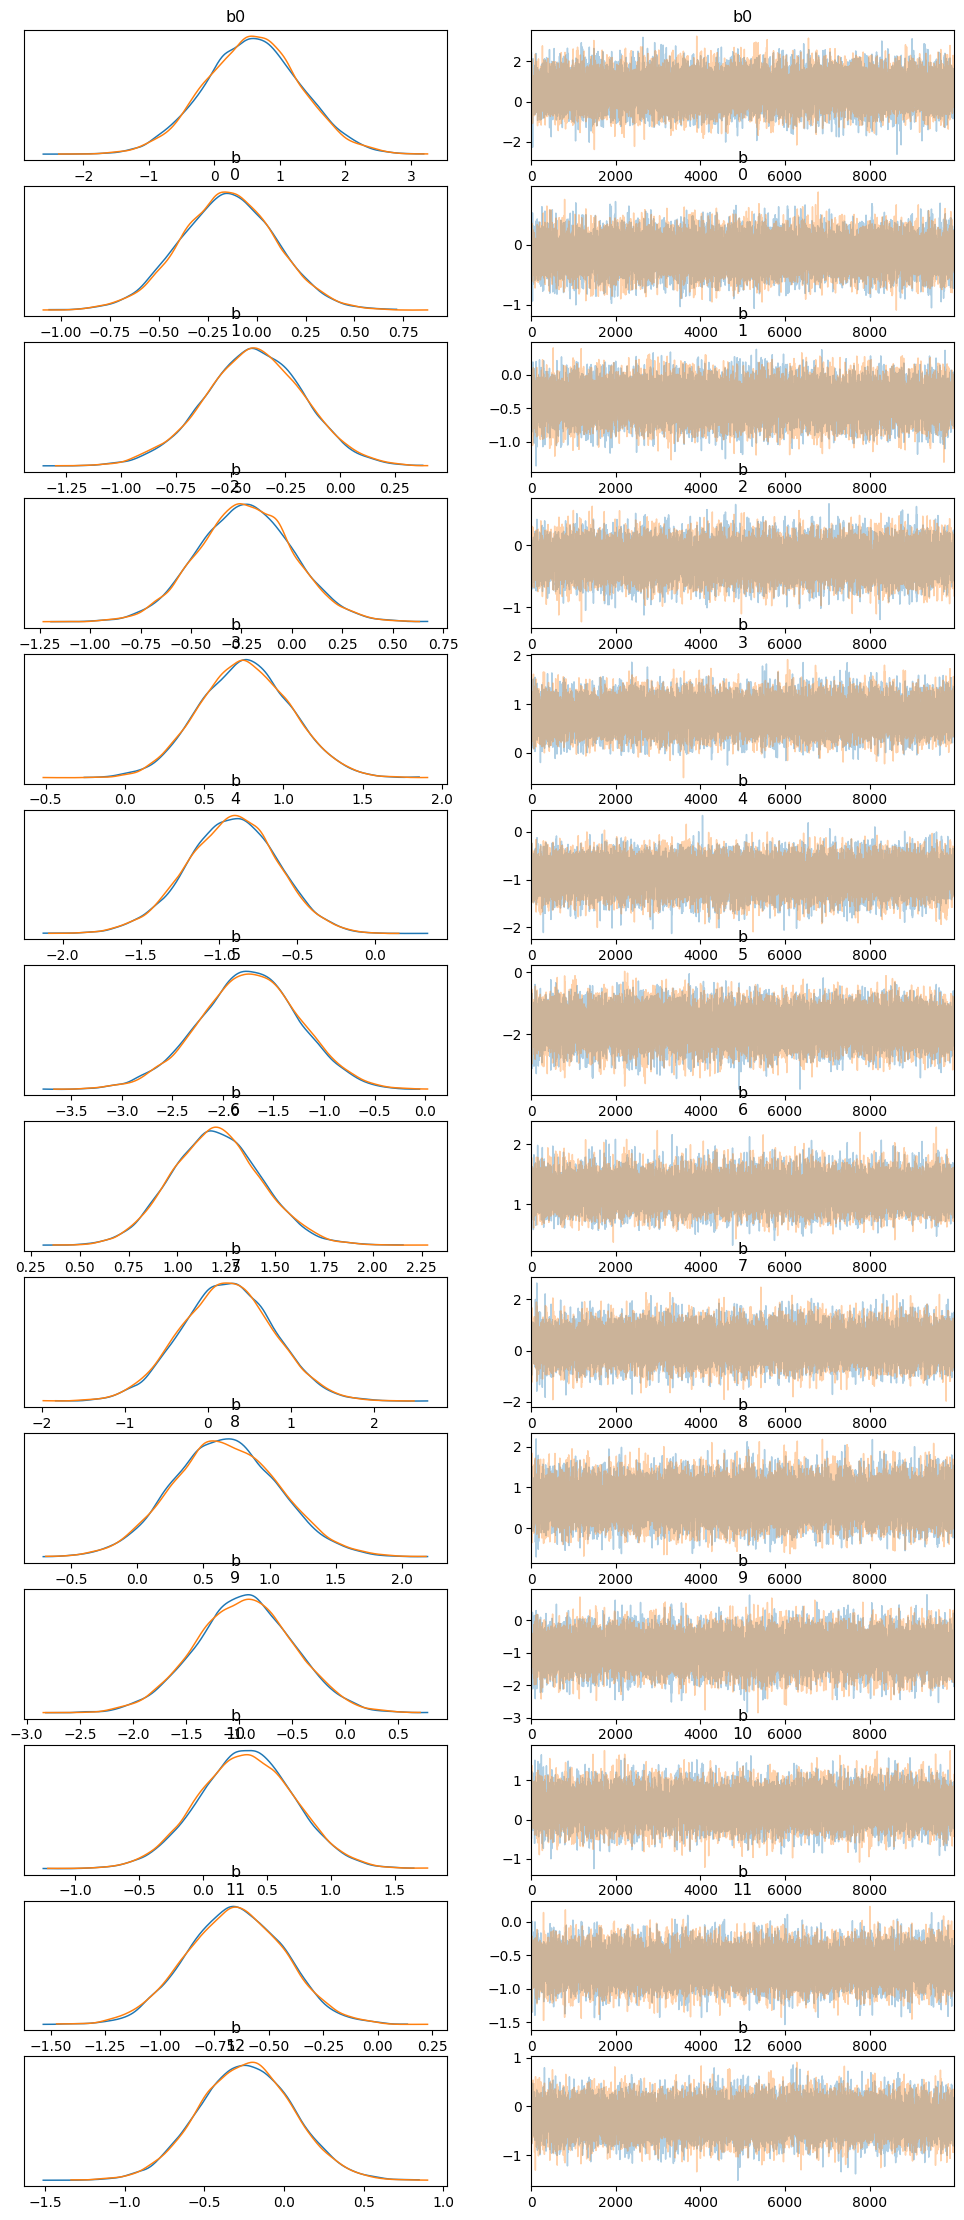

In [32]:
az.plot_trace(trace_main, var_names=['b0','b'], compact = False)

The traceplots show good convergence.

Based on the results from the full model, we can see that the variables b[3], b[4], b[5], b[6], b[9], b[11] do not include 0 within their 95% HDI range. 

### Reduced Model 1 : Based on HDI

In [69]:
X_heart = X[...,[3, 4, 5, 6, 9, 11]]
k_heart = X_heart.shape[1]

with pm.Model() as heart_reduced:
    
    x = pm.MutableData("x", X_heart)
    Y = pm.MutableData("Y", y)
    
    # Intercept term & prior
    B0 = pm.Normal('B0', mu=0, sigma=10)
    # Beta coefficients for predictor variables & priors
    B = pm.MvNormal('B', mu=np.zeros(k_heart), cov=10*np.eye(k_heart), shape=k_heart)
    
    # Calculate the logit 
    u = B0 + pm.math.dot(x, B)
    p = pm.Deterministic('p', pm.invlogit(u))
    
    # Pass the logits to a Bernoulli outcome, with the observed data
    y_hat = pm.Bernoulli('y_hat', p=p, observed=Y)

    trace_heart = pm.sample(1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [B0, B]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 265 seconds.


In [70]:
az.summary(trace_heart, var_names=['B0','B'], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
B0,1.20,0.52,0.27,2.26,0.01,0.01,1415.72,1139.24,1.0
B[0],0.77,0.28,0.28,1.34,0.01,0.01,1638.09,1161.63,1.0
B[1],-1.17,0.28,-1.69,-0.67,0.01,0.01,1730.75,1256.62,1.0
B[2],-1.94,0.56,-2.99,-0.86,0.02,0.01,1283.20,1223.23,1.0
B[3],1.18,0.24,0.76,1.65,0.01,0.00,1538.41,1508.93,1.0
B[4],-1.31,0.50,-2.18,-0.35,0.01,0.01,2113.50,1506.00,1.0
B[5],-0.66,0.22,-1.07,-0.26,0.01,0.00,1839.19,1549.56,1.0


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

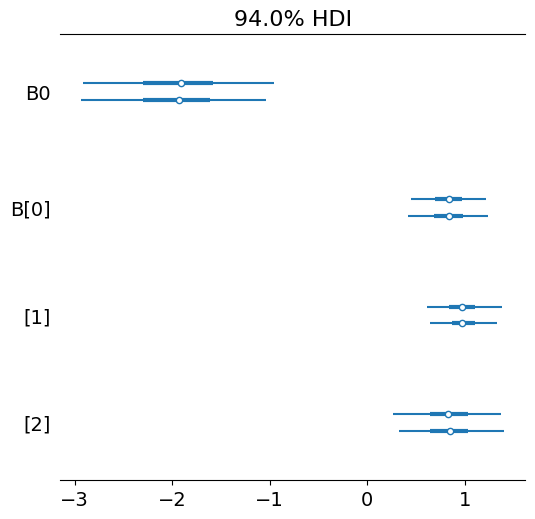

In [35]:
az.plot_forest(trace_heart, var_names=['B0','B'])

array([[<AxesSubplot:title={'center':'B0'}>,
        <AxesSubplot:title={'center':'B0'}>],
       [<AxesSubplot:title={'center':'B\n0'}>,
        <AxesSubplot:title={'center':'B\n0'}>],
       [<AxesSubplot:title={'center':'B\n1'}>,
        <AxesSubplot:title={'center':'B\n1'}>],
       [<AxesSubplot:title={'center':'B\n2'}>,
        <AxesSubplot:title={'center':'B\n2'}>]], dtype=object)

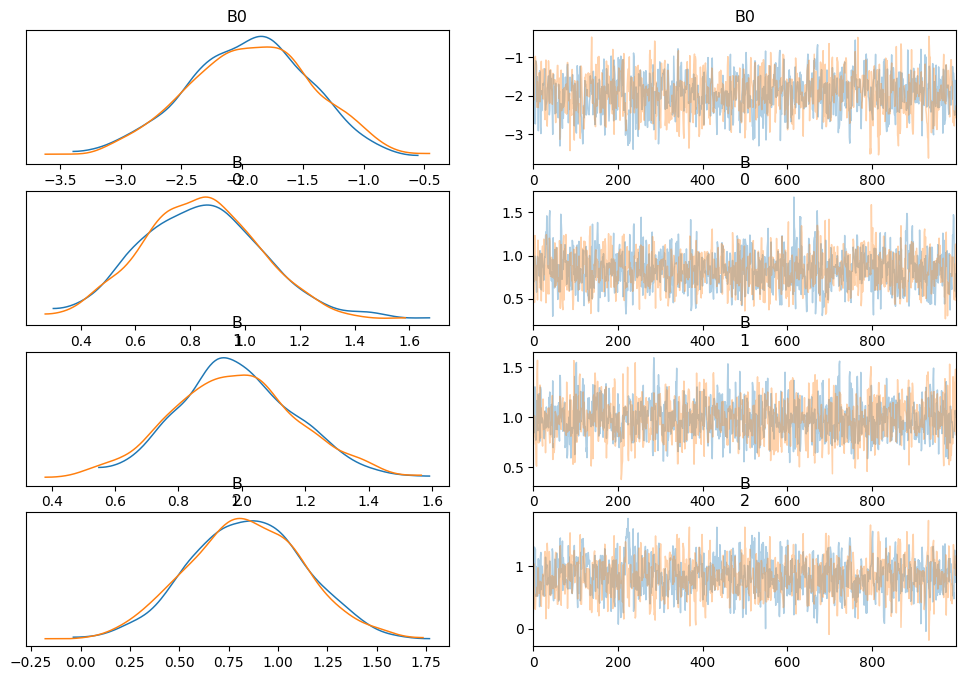

In [36]:
az.plot_trace(trace_heart, var_names=['B0','B'],compact =False)

In [37]:
# WAIC
cmp_waic = az.compare({'full_model':trace_main,'reduced_model':trace_heart}, 
                     ic = 'WAIC')
cmp_waic

C:\Users\duxvo\anaconda3\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
full_model,0,-80.612484,12.025636,0.000000,0.956175,9.053605,0.000000,True,log
reduced_model,1,-106.421273,4.323012,25.808789,0.043825,8.536294,7.215841,False,log


### Reduced Model 2: Based on Prior Knowledge

link: https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm?fbclid=IwAR0rHbYs4BlE2TXQxFI1_uFtD56WPp_0nvpusT3pR47E6ZdFZbF80aPZoZc#:~:text=The%20Nation%27s%20Risk%20Factors%20and,unhealthy%20diet%2C%20and%20physical%20inactivity <br>
https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106?fbclid=IwAR1l7zfcDWbP70ltixP7PFKPd9jRRkkNVcBRu75v_vHJl3BGcLXE1oaeKwk <br>

In [38]:
X_heart_med = X[...,[0, 1, 3, 4, 5]]
k_heart_med = X_heart_med.shape[1]

with pm.Model() as heart_reduced_med:
    
    x = pm.MutableData("x", X_heart_med)
    Y = pm.MutableData("Y", y)
    
    # Intercept term & prior
    B0 = pm.Normal('B0', mu=0, sigma=10)
    # Beta coefficients for predictor variables & priors
    B = pm.MvNormal('B', mu=np.zeros(k_heart_med), cov=10*np.eye(k_heart_med), shape=k_heart_med)
    
    # Calculate the logit 
    u = B0 + pm.math.dot(x, B)
    p = pm.Deterministic('p', pm.invlogit(u))
    
    # Pass the logits to a Bernoulli outcome, with the observed data
    y_hat = pm.Bernoulli('y_hat', p=p, observed=Y)

    trace_heart_med = pm.sample(1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [B0, B]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 199 seconds.


In [39]:
az.summary(trace_heart_med, var_names=['B0','B'], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
B0,1.36,0.36,0.69,2.03,0.01,0.01,1184.19,1089.98,1.0
B[0],-0.22,0.20,-0.56,0.20,0.00,0.00,1956.74,1463.12,1.0
B[1],-0.25,0.19,-0.60,0.11,0.00,0.00,2142.63,1515.10,1.0
B[2],1.03,0.23,0.62,1.49,0.01,0.00,2120.74,1461.75,1.0
B[3],-0.83,0.22,-1.26,-0.42,0.00,0.00,2247.76,1157.85,1.0
B[4],-1.69,0.42,-2.48,-0.92,0.01,0.01,1205.03,1065.21,1.0


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

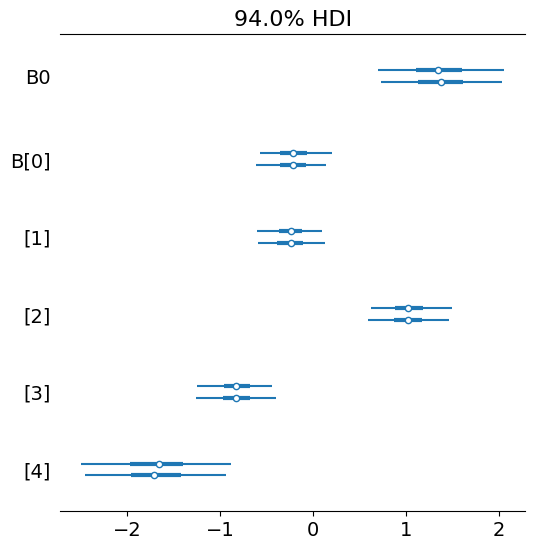

In [40]:
az.plot_forest(trace_heart_med, var_names=['B0','B'])

In [41]:
cmp_waic = az.compare({'full_model':trace_main,'med_prior_model':trace_heart_med, 'reduced_model':trace_heart}, 
                     ic = 'WAIC',  scale='deviance')
cmp_waic

C:\Users\duxvo\anaconda3\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\duxvo\anaconda3\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
full_model,0,161.224968,12.025636,0.000000,0.882057,18.107211,0.000000,True,deviance
reduced_model,1,212.842547,4.323012,51.617578,0.016631,17.072588,14.431683,False,deviance
med_prior_model,2,215.423147,6.884594,54.198179,0.101312,16.095409,16.327499,True,deviance


#### Creating a combined model

In [57]:
# BMA weights

w = cmp_waic.loc[:,'weight']

b_main = trace_main.posterior['b']
b_reduced = trace_heart.posterior['B']
b_med = trace_heart_med.posterior['B']

b_bma = w[0]*b_reduced + w[1]*b_main + w[2]*b_med 

As we could see earlier, the variable age is the most normally distributed, so we will compare the models with the age variable. 

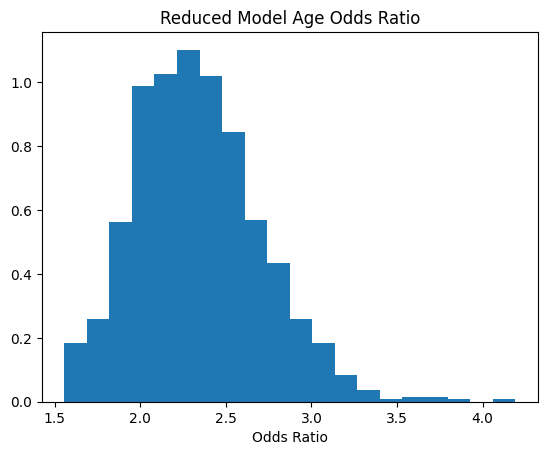

In [58]:
# Full Model age Odds Ratio

b = trace_heart.posterior['B'][:,:,0]
OR = np.mean(b, axis =0)
plt.hist(np.exp(OR), bins=20, density=True)
plt.xlabel("Odds Ratio")
plt.title("Reduced Model Age Odds Ratio")
plt.show()

In [59]:
# 95% CI for Age Odds Ratio

lb, ub = np.percentile(OR, 2.5), np.percentile(OR, 97.5)

print("P({:.3f} < O.R. < {:.3f}) = 0.95".format(np.exp(lb), np.exp(ub)))

P(1.692 < O.R. < 3.110) = 0.95


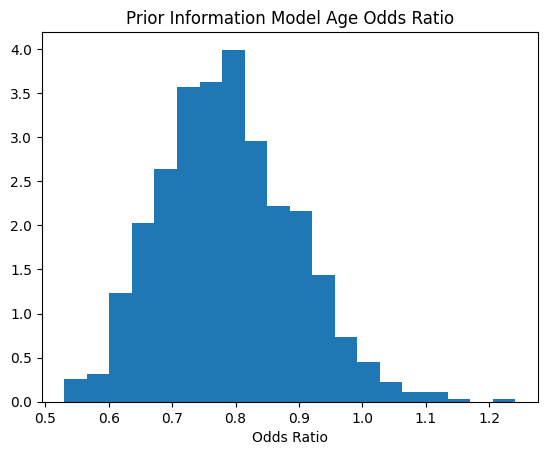

In [60]:
# Reduced by Prior Model Age Odds Ratio

b = trace_heart_med.posterior['B'][:,:,1]
OR = np.mean(b, axis =0)
plt.hist(np.exp(OR), bins=20, density=True)
plt.xlabel("Odds Ratio")
plt.title("Prior Information Model Age Odds Ratio")
plt.show()

In [61]:
# 95% CI for pH Odds Ratio

lb, ub = np.percentile(OR, 2.5), np.percentile(OR, 97.5)

print("P({:.3f} < O.R. < {:.3f}) = 0.95".format(np.exp(lb), np.exp(ub)))

P(0.605 < O.R. < 1.011) = 0.95


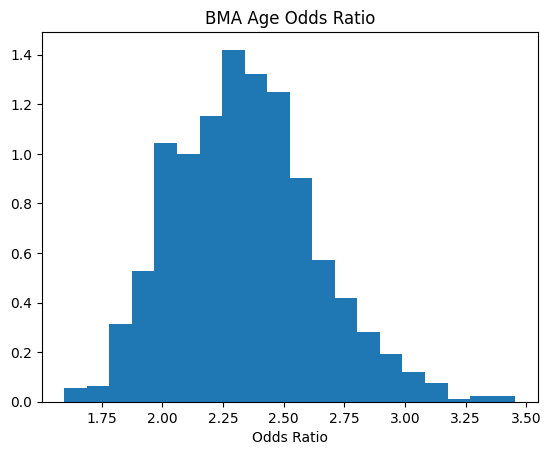

In [65]:
# BMA Odds Ratio

w = cmp_waic.loc[:,'weight']

b_reduced = trace_heart.posterior['B'][:,:,1]
b_prior_reduced = trace_heart_med.posterior['B'][:,:,1]
b = w[0]*b_reduced + w[2]*b_prior_reduced
OR = np.mean(b, axis =0)
plt.hist(np.exp(OR), bins=20, density=True)
plt.xlabel("Odds Ratio")
plt.title("BMA Age Odds Ratio")
plt.show()

In [66]:
# 95% CI for Age Odds Ratio

lb, ub = np.percentile(OR, 2.5), np.percentile(OR, 97.5)

print("P({:.3f} < O.R. < {:.3f}) = 0.95".format(np.exp(lb), np.exp(ub)))

P(1.840 < O.R. < 2.983) = 0.95


### Predictions

In [68]:
test_X, test_Y = clean(test)

In [78]:
testX_reduced = test_X[...,[0, 1, 3, 4, 5]]
with heart_reduced_med:
    pm.set_data({"x": testX_reduced})
    pm.set_data({"Y": test_Y})
    y_test = pm.sample_posterior_predictive(trace_heart_med)
preds = y_test.posterior_predictive['y_hat'].mean(("chain", "draw"))

Sampling: [y_hat]


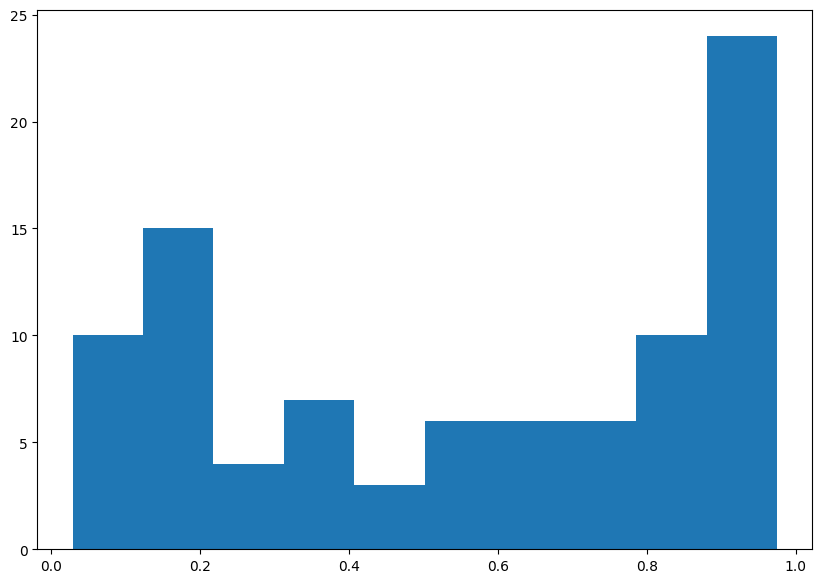

In [79]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(list(preds.values))  
plt.show()

In [81]:
test["predictions"] = list(preds.values)
test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predictions
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0.1055
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,0.7370
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0.6720
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,0.1290
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0.0930


In [83]:
threshold = 1/8
test["predictions"] = np.where(test['predictions'] < threshold, 0, 1)
test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predictions
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,0


In [84]:
TP = len(test[(test["output"]==1) & (test["predictions"]==1)])
TN = len(test[(test["output"]==0) & (test["predictions"]==0)])
FP = len(test[(test["output"]==0) & (test["predictions"]==1)])
FN = len(test[(test["output"]==1) & (test["predictions"]==0)])
row1 = (FP + TN)
row2 = (TP + FN)
TP_prop = round(TP / row2, 2)
FN_prop = round(FN / row2, 2)
TN_prop = round(TN / row1, 2)
FP_prop = round(FP / row1, 2)
print("True Positive: ", TP_prop)
print("True Negative: ", TN_prop)
print("False Positive: ", FP_prop)
print("False Negative: ", FN_prop)

True Positive:  0.98
True Negative:  0.22
False Positive:  0.78
False Negative:  0.02


### Accuracy

In [85]:
print("Accuracy: ", str(round((TP+TN)/(TP+TN+FP+FN),4)*100), "%")

Accuracy:  63.739999999999995 %


### Precision

In [86]:
print("Precision: ", str(round((TP)/(TP+FP),4)*100), "%")

Precision:  60.49 %
